# 🦠 Flu Forecast Hub - Exploratory Data Analysis

This notebook explores CDC flu surveillance data to understand:
- Seasonal patterns
- Year-over-year trends
- Data quality and distribution

**Author:** Anita  
**Date:** 2025

## 1. Setup & Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
%matplotlib inline

print("Libraries loaded successfully! ✅")

Libraries loaded successfully! ✅


In [4]:
# Load the data
df = pd.read_csv('C:/Users/Ani/OneDrive/Desktop/flu-forecast-hub/data/raw/ili_national.csv')
print(f"Dataset Shape: {df.shape}")
print(f"Rows: {len(df):,}")
print(f"Columns: {len(df.columns)}")

Dataset Shape: (312, 7)
Rows: 312
Columns: 7


## 2. Data Overview

In [5]:
# First look at the data
df.head(10)

,year,week,region,ili_percentage,num_providers,total_patients,total_ili
0,2020,1,National,5.00,3294,104886,7265
1,2020,2,National,4.12,3482,94131,3919
2,2020,3,National,6.33,3332,50769,3391
3,2020,4,National,6.83,2385,55311,6051
4,2020,5,National,4.23,3337,78693,7396
5,2020,6,National,5.23,2474,75658,3558
6,2020,7,National,4.06,2699,109150,1189
7,2020,8,National,3.86,2562,117435,2267
8,2020,9,National,5.87,2646,60627,1600
9,2020,10,National,7.36,2776,73897,3612


In [6]:
# Data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            312 non-null    int64  
 1   week            312 non-null    int64  
 2   region          312 non-null    object 
 3   ili_percentage  312 non-null    float64
 4   num_providers   312 non-null    int64  
 5   total_patients  312 non-null    int64  
 6   total_ili       312 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 17.2+ KB


In [7]:
# Statistical summary
df.describe()

,year,week,ili_percentage,num_providers,total_patients,total_ili
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2022.500000,26.500000,3.111827,2771.435897,83871.907051,4577.493590
std,1.710569,15.032441,1.899997,426.366895,20004.544257,1975.302049
min,2020.000000,1.000000,0.620000,2000.000000,50117.000000,1004.000000
25%,2021.000000,13.750000,1.597500,2474.750000,66680.500000,2976.750000
50%,2022.500000,26.500000,2.620000,2775.000000,85166.500000,4604.500000
75%,2024.000000,39.250000,4.192500,3130.750000,102426.750000,6189.000000
max,2025.000000,52.000000,9.150000,3497.000000,119669.000000,7991.000000


In [8]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values! ✅")

Missing Values:
No missing values! ✅


## 3. ILI Percentage Distribution

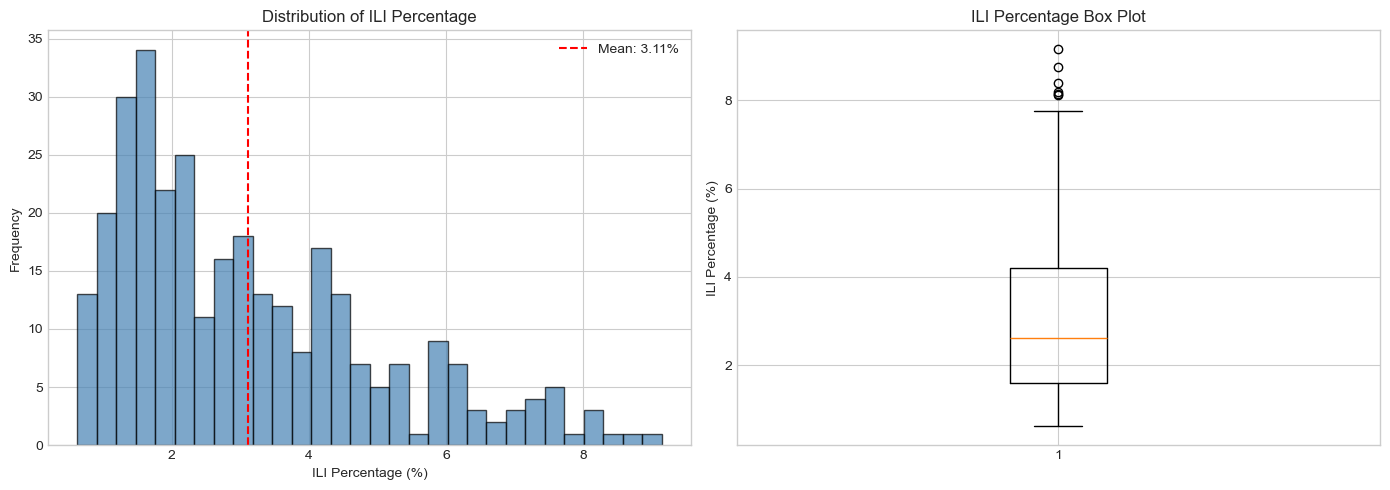

In [9]:
# Distribution of ILI percentage
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['ili_percentage'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('ILI Percentage (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of ILI Percentage')
axes[0].axvline(df['ili_percentage'].mean(), color='red', linestyle='--', label=f"Mean: {df['ili_percentage'].mean():.2f}%")
axes[0].legend()

# Box plot
axes[1].boxplot(df['ili_percentage'], vert=True)
axes[1].set_ylabel('ILI Percentage (%)')
axes[1].set_title('ILI Percentage Box Plot')

plt.tight_layout()
plt.show()

## 4. Time Series Analysis

C:\Users\Ani\AppData\Local\Temp\ipykernel_11144\57272486.py:13: UserWarning: Glyph 129440 (\N{MICROBE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129440 (\N{MICROBE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


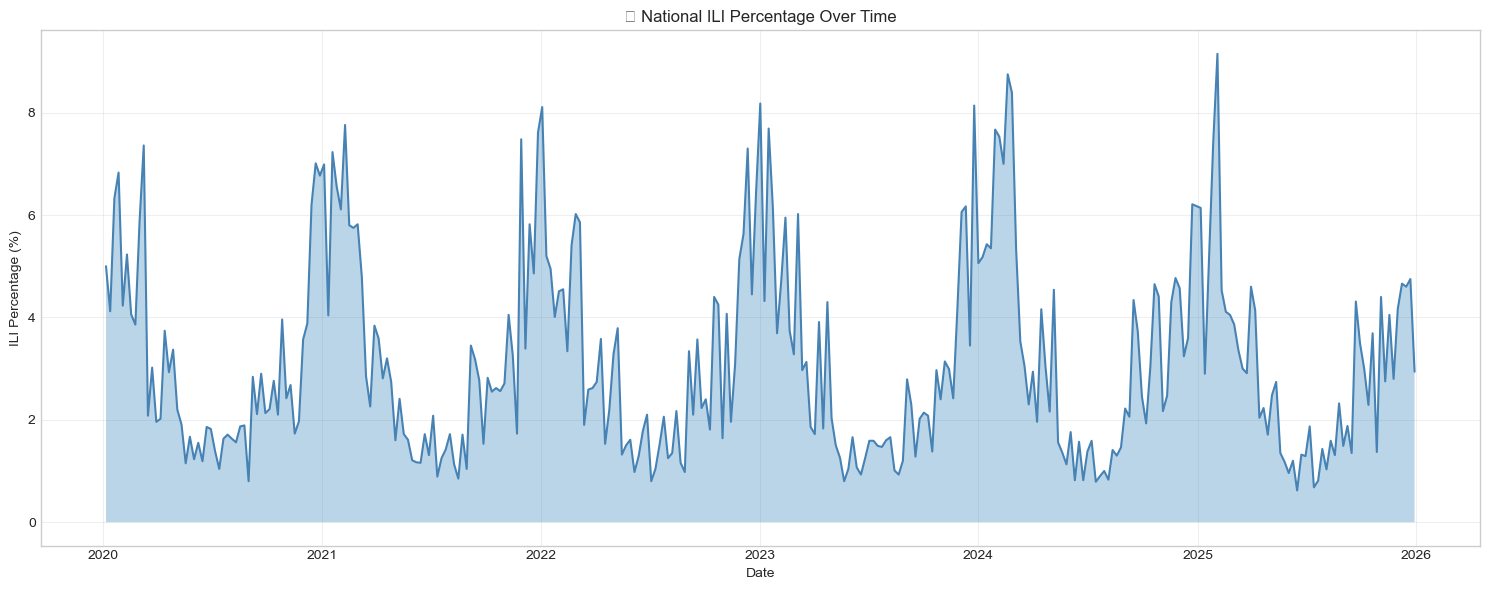

In [10]:
# Create a date column for better plotting
df['date'] = pd.to_datetime(df['year'].astype(str) + '-W' + df['week'].astype(str).str.zfill(2) + '-1', format='%Y-W%W-%w')
df = df.sort_values('date')

# Plot full time series
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['ili_percentage'], linewidth=1.5, color='steelblue')
plt.fill_between(df['date'], df['ili_percentage'], alpha=0.3)
plt.xlabel('Date')
plt.ylabel('ILI Percentage (%)')
plt.title('🦠 National ILI Percentage Over Time')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Seasonal Patterns

C:\Users\Ani\AppData\Local\Temp\ipykernel_11144\3310873738.py:17: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


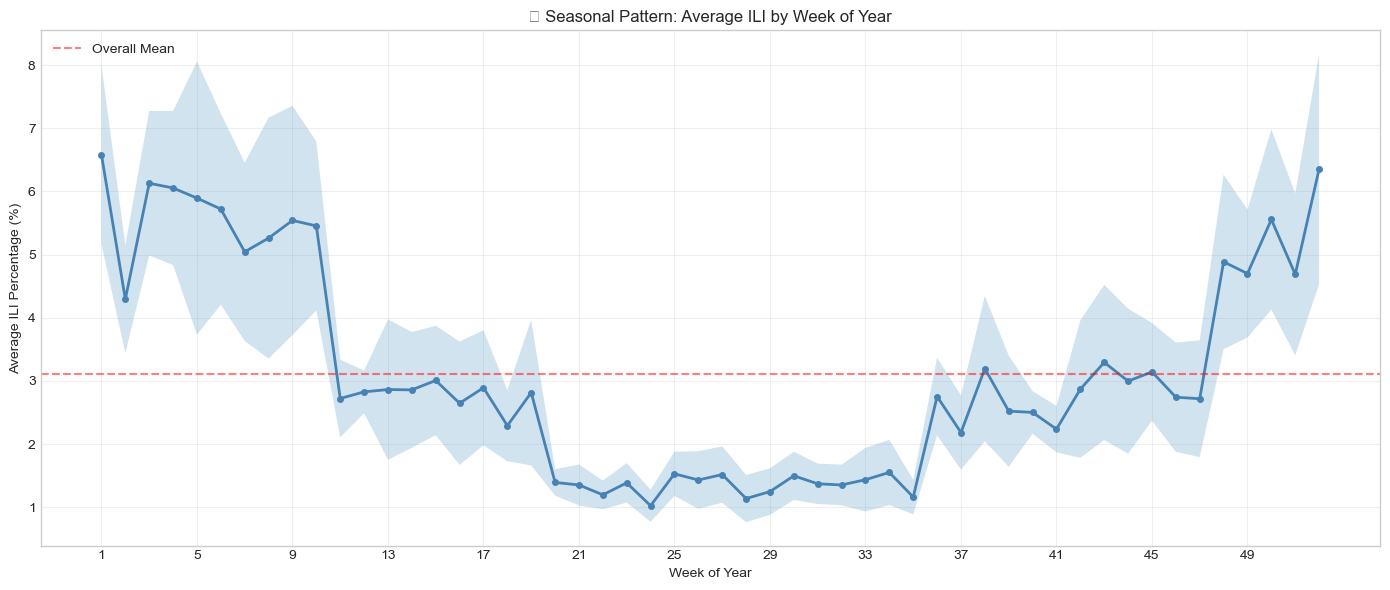

In [11]:
# Average ILI by week (across all years)
weekly_avg = df.groupby('week')['ili_percentage'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(14, 6))
plt.plot(weekly_avg['week'], weekly_avg['mean'], linewidth=2, color='steelblue', marker='o', markersize=4)
plt.fill_between(weekly_avg['week'], 
                 weekly_avg['mean'] - weekly_avg['std'],
                 weekly_avg['mean'] + weekly_avg['std'],
                 alpha=0.2)
plt.xlabel('Week of Year')
plt.ylabel('Average ILI Percentage (%)')
plt.title('📅 Seasonal Pattern: Average ILI by Week of Year')
plt.xticks(range(1, 53, 4))
plt.axhline(y=df['ili_percentage'].mean(), color='red', linestyle='--', alpha=0.5, label='Overall Mean')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\Ani\AppData\Local\Temp\ipykernel_11144\1719650765.py:9: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ani\AppData\Local\Temp\ipykernel_11144\1719650765.py:9: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


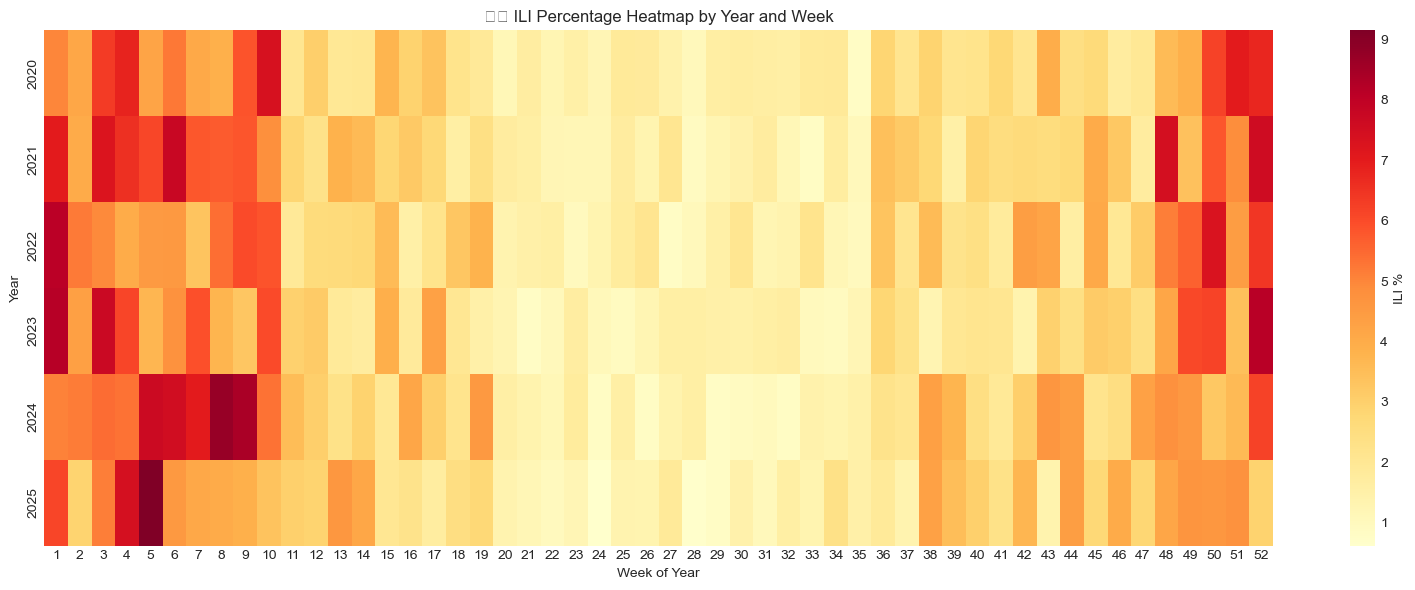

In [12]:
# Heatmap: ILI by Year and Week
pivot_data = df.pivot_table(values='ili_percentage', index='year', columns='week', aggfunc='mean')

plt.figure(figsize=(16, 6))
sns.heatmap(pivot_data, cmap='YlOrRd', cbar_kws={'label': 'ILI %'})
plt.xlabel('Week of Year')
plt.ylabel('Year')
plt.title('🗓️ ILI Percentage Heatmap by Year and Week')
plt.tight_layout()
plt.show()

## 6. Year-over-Year Comparison

C:\Users\Ani\AppData\Local\Temp\ipykernel_11144\2322593984.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


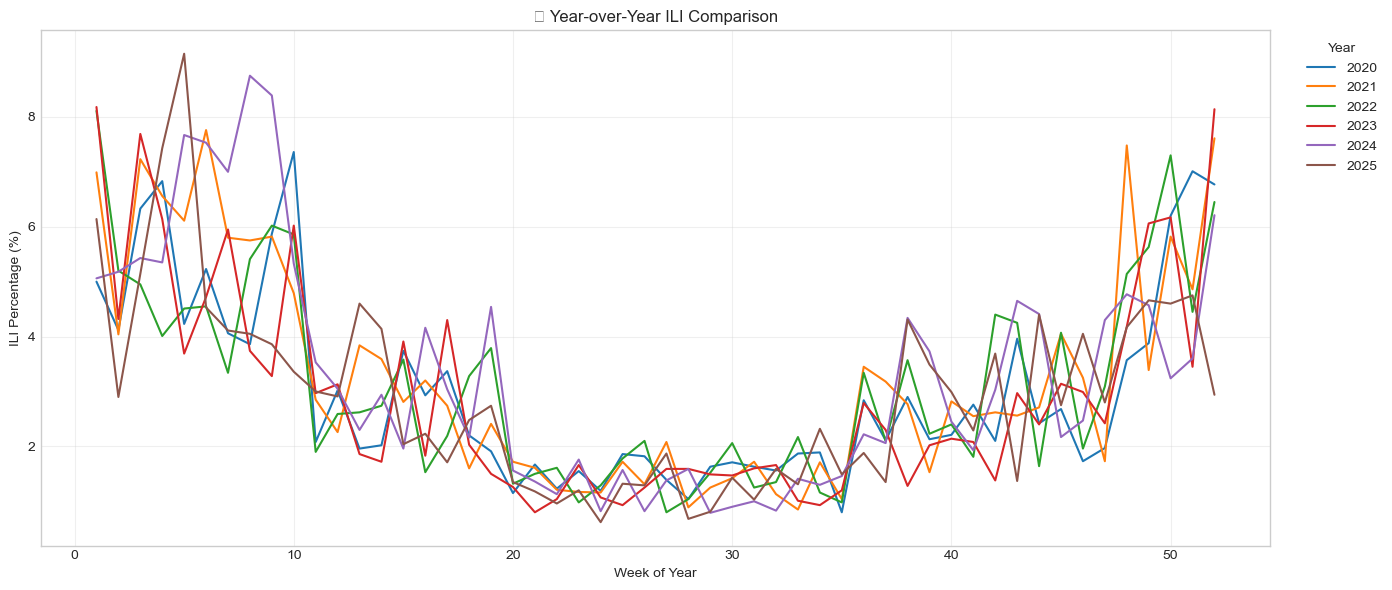

In [13]:
# Compare years
plt.figure(figsize=(14, 6))

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    plt.plot(year_data['week'], year_data['ili_percentage'], label=str(int(year)), linewidth=1.5)

plt.xlabel('Week of Year')
plt.ylabel('ILI Percentage (%)')
plt.title('📊 Year-over-Year ILI Comparison')
plt.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
# Annual statistics
annual_stats = df.groupby('year')['ili_percentage'].agg(['mean', 'max', 'min', 'std']).round(2)
annual_stats.columns = ['Mean ILI %', 'Max ILI %', 'Min ILI %', 'Std Dev']
annual_stats

,Mean ILI %,Max ILI %,Min ILI %,Std Dev
year,,,,
2020,3.03,7.36,0.80,1.76
2021,3.28,7.76,0.85,2.03
2022,3.13,8.11,0.80,1.80
2023,2.95,8.18,0.80,1.97
2024,3.33,8.75,0.79,2.11
2025,2.95,9.15,0.62,1.76


## 7. Key Insights

In [15]:
# Summary insights
print("=" * 50)
print("🔍 KEY INSIGHTS")
print("=" * 50)

print(f"\n📊 Overall Statistics:")
print(f"   • Average ILI: {df['ili_percentage'].mean():.2f}%")
print(f"   • Peak ILI: {df['ili_percentage'].max():.2f}% (Week {df.loc[df['ili_percentage'].idxmax(), 'week']}, {int(df.loc[df['ili_percentage'].idxmax(), 'year'])})")
print(f"   • Lowest ILI: {df['ili_percentage'].min():.2f}%")

# Find peak weeks
peak_weeks = weekly_avg.nlargest(5, 'mean')
print(f"\n📅 Peak Flu Weeks (highest average):")
for _, row in peak_weeks.iterrows():
    print(f"   • Week {int(row['week'])}: {row['mean']:.2f}%")

# Find low weeks
low_weeks = weekly_avg.nsmallest(5, 'mean')
print(f"\n📅 Low Flu Weeks (lowest average):")
for _, row in low_weeks.iterrows():
    print(f"   • Week {int(row['week'])}: {row['mean']:.2f}%")

🔍 KEY INSIGHTS

📊 Overall Statistics:
   • Average ILI: 3.11%
   • Peak ILI: 9.15% (Week 5, 2025)
   • Lowest ILI: 0.62%

📅 Peak Flu Weeks (highest average):
   • Week 1: 6.58%
   • Week 52: 6.35%
   • Week 3: 6.13%
   • Week 4: 6.05%
   • Week 5: 5.89%

📅 Low Flu Weeks (lowest average):
   • Week 24: 1.03%
   • Week 28: 1.14%
   • Week 35: 1.16%
   • Week 22: 1.20%
   • Week 29: 1.25%


## 8. Save Processed Data

In [17]:
# Save processed data with date column
df.to_csv('C:/Users/Ani/OneDrive/Desktop/flu-forecast-hub/data/processed/ili_national_processed.csv', index=False)
print("Processed data saved to: data/processed/ili_national_processed.csv")

Processed data saved to: data/processed/ili_national_processed.csv
